# 02. Библиотека PyTorch

## План
1. `numpy` -> `pytorch`
2. Автоматическое дифференцирование (`torch.autograd`)
3. Пример: задача регрессии
4. Переопределение `backward()`


[PyTorch](https://pytorch.org) - это фреймворк для машинного обучения:
* В первую очередь - для нейросетевых моделей
* Большие возможности для работы с тензорами
* Поддержка выполнения на CPU / GPU / TPU ([!](https://github.com/pytorch/xla))
* Автоматическое дифференцирование вычислительных графов (`torch.autograd`)
* Широкий набор строительных блоков для DL-моделей (`torch.nn`) и готовых архитектур (`torchvision.models`+)
* Удобная поддержка реализации своих операций / слоев / функций потерь / ...

## 1. `numpy` <-> `pytorch`

In [1]:
import torch
import numpy as np
import time

### 1.1. Работа с тензорами

~Все, что можно делать с многомерными массивами в `numpy`, можно делать и в `pytorch`:
* `np.ndarray` -> `torch.Tensor`
    * [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)
* `np.zeros()` -> `torch.zeros()`
* `np.stack()` -> `torch.stack()`
* `np.concatenate` -> `torch.cat()` 
* `np.random.normal()` -> `torch.randn()`
* ...

#### `np.ndarray` <-> `torch.Tensor`

In [2]:
data_np = np.random.uniform(size=(3, 3))
data_np.shape

(3, 3)

In [3]:
data_np

array([[0.83869386, 0.95509596, 0.99434133],
       [0.06305396, 0.66546129, 0.45132992],
       [0.68912379, 0.91360254, 0.9169107 ]])

Создание тензора из данных в форме `numpy.ndarray` через [`torch.from_numpy()`](https://pytorch.org/docs/stable/generated/torch.from_numpy.html):

In [4]:
data_pt = torch.from_numpy(data_np)
data_pt.shape

torch.Size([3, 3])

In [5]:
data_np == data_pt.numpy()  # <- get data from Tensor as numpy array

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [6]:
data_np.dtype

dtype('float64')

In [7]:
data_pt.dtype

torch.float64

Важно: при создании тензора через `torch.from_numpy()` данные шарятся между объектами:

In [8]:
t = data_pt.numpy() 
t -= 1000
data_pt

tensor([[-999.1613, -999.0449, -999.0057],
        [-999.9369, -999.3345, -999.5487],
        [-999.3109, -999.0864, -999.0831]], dtype=torch.float64)

In [9]:
data_np

array([[-999.16130614, -999.04490404, -999.00565867],
       [-999.93694604, -999.33453871, -999.54867008],
       [-999.31087621, -999.08639746, -999.0830893 ]])

Создание тензора через конструктор `torch.tensor()`:

In [10]:
data_np = np.random.uniform(size=(3, 3))
data_np.shape

(3, 3)

In [11]:
data_pt = torch.tensor(data_np)
data_pt.shape

torch.Size([3, 3])

In [12]:
data_np == data_pt.numpy()

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

При создании тензора через `torch.tensor()` данные копируются:

In [13]:
t = data_pt.numpy()
t -= 1000
data_pt

tensor([[-999.4625, -999.3375, -999.0617],
        [-999.6645, -999.3929, -999.3243],
        [-999.2786, -999.1055, -999.3943]], dtype=torch.float64)

In [14]:
data_np

array([[0.53751275, 0.66251523, 0.93834524],
       [0.3355004 , 0.60709476, 0.67570673],
       [0.72138201, 0.89449512, 0.6057461 ]])

**NB**: [`torch.Tensor()`](https://glaringlee.github.io/tensors.html?highlight=torch%20tensor#torch.Tensor) != [`torch.tensor()`](https://glaringlee.github.io/generated/torch.tensor.html?highlight=torch%20tensor#torch.tensor)!

#### Типы данных

In [15]:
data_np.dtype

dtype('float64')

floats

In [16]:
data_pt = torch.tensor(data_np)
data_pt.dtype

torch.float64

In [17]:
data_pt = torch.tensor(data_np, dtype=torch.float)
data_pt.dtype

torch.float32

In [18]:
data_pt = torch.tensor(data_np, dtype=torch.float16)
data_pt.dtype

torch.float16

In [19]:
data_pt = torch.tensor(data_np, dtype=torch.half)
data_pt.dtype

torch.float16

In [20]:
data_pt = torch.tensor(data_np, dtype=torch.double)
data_pt.dtype

torch.float64

ints

In [21]:
data_pt = torch.tensor(data_np, dtype=torch.int)
data_pt.dtype

torch.int32

In [22]:
data_pt = torch.tensor(data_np, dtype=torch.long)
data_pt.dtype

torch.int64

In [23]:
data_pt = torch.tensor(data_np, dtype=torch.int8)
data_pt.dtype

torch.int8

Больше - [тут](https://pytorch.org/docs/stable/tensors.html).

Можно и без `numpy`, разумеется:

In [24]:
torch.tensor(2)

tensor(2)

In [25]:
torch.tensor([1, 2, 3, 4, 5])

tensor([1, 2, 3, 4, 5])

In [26]:
torch.tensor([[0., 1], [2, 3]])

tensor([[0., 1.],
        [2., 3.]])

Если в тензоре один-единственный элемент, извлечь его численное значение можно через `.item()`:

In [27]:
x = torch.tensor(10)
x.item()

10

In [28]:
x = torch.tensor([10, 11])
x.item()

RuntimeError: a Tensor with 2 elements cannot be converted to Scalar

**NB**: поведение конструкторов `torch.tensor()` и `torch.Tensor()` - разное:

In [ ]:
torch.Tensor([1, 2, 3])

In [ ]:
torch.Tensor(1)

In [ ]:
torch.Tensor(2)

#### Broadcasting

In [ ]:
data_np = np.random.uniform(size=(3, 3))
data_pt = torch.from_numpy(data_np)
data_pt

In [ ]:
data_pt -= 100
data_pt

Обратите внимание на особенности broadcasting в "неочевидных" случаях (часто лучше перепроверить):

In [ ]:
data_np = np.random.uniform(size=(3, 3)).astype(np.float32)
data_pt = torch.from_numpy(data_np)
data_pt

In [ ]:
b = torch.Tensor([100, 50, 0])
b.shape

In [ ]:
data_pt + b

In [ ]:
b = torch.Tensor([100, 50, 0]).view(1, 3)
b.shape

In [ ]:
data_pt + b

In [ ]:
b = torch.Tensor([100, 50, 0]).view(3, 1)
b.shape

In [ ]:
data_pt + b

#### Векторные и матричные операции

In [ ]:
data_np = np.random.uniform(size=(16, 16))
data_pt = torch.from_numpy(data_np)

In [ ]:
%timeit data_np @ data_np

In [ ]:
%timeit data_pt @ data_pt

In [ ]:
x = torch.randn(4, 1)
A = torch.randn(8, 4)

Умножение матрицы на вектор:

In [ ]:
y = A @ x
y.shape, y

In [ ]:
y = A.matmul(x)
y.shape, y

Тоже повнимательнее с размерностями:

In [ ]:
x = torch.randn(4)
A = torch.randn(8, 4)

In [ ]:
y = A @ x
y.shape, y

#### Задание:

* Даны два набора векторов одинаковой размерности, `X` (`m x dim`) и `Y` (`n x dim`)
* Требуется посчитать (без циклов!) попарные значения косинуса углов для всех пар (`x`, `y`)
    * На выходе ожидается матрица размером (`m x n`)

In [ ]:
dim = 8
m = 11
n = 17
X = torch.randn(m, dim)
Y = torch.randn(n, dim)

# YOUR CODE HERE
X_n = X / torch.norm( X, dim = 1, keepdim=True)
Y_n = Y / torch.norm( Y, dim = 1, keepdim=True)
cos_mat = X_n @ Y_n.T

# END OF YOUR CODE

In [ ]:
from scipy.spatial.distance import cdist
cos_mat_expected = 1 - cdist(X, Y, metric="cosine")

torch.testing.assert_allclose(cos_mat, cos_mat_expected)

#### Работа с размерностями

In [ ]:
x = torch.randn(3, 1)
x.shape, x

Транспонирование:

In [ ]:
xT = x.T
xT.shape, xT

Если не указано явно, то данные НЕ копируются:

In [ ]:
xT *= 100
xT

In [ ]:
x

С копированием:

In [ ]:
xT_clone = x.T.clone()
xT_clone.shape, xT_clone

In [ ]:
xT_clone == xT

In [ ]:
xT_clone *= 100
xT_clone

In [ ]:
x

Доступны и более сложные операции над размерностями.

`permute()`:

In [ ]:
x = torch.randn(3, 64, 256)
x.shape

In [ ]:
x.permute(1, 2, 0).shape

In [ ]:
x.transpose(1, 2).shape

`view()`:

In [ ]:
x = torch.randn(3, 64, 256)
x.shape

In [ ]:
x.view(3, 256, 64).shape

In [ ]:
x.view(3, -1).shape

In [ ]:
x.view(-1).shape

In [ ]:
z = x.view(-1)
z

In [ ]:
z *= 0

In [ ]:
z

In [ ]:
x = torch.randn(3, 64, 256)

In [ ]:
y = x[:,:3,:3]

In [ ]:
print(y)

In [ ]:
print(id(y.data))
print(y.view(-1))


In [ ]:
z = y.reshape(-1)
print(id(z.data))
print(z)

#### Задание:

* Создать тензор размером `1x3x224x224` (имитируем батч из одной картинки с 3 каналами RGB размером `224х224`)
    * Все значения в тензоре = `0.5`
* Выполнить нормализацию через mean / std из датасета Imagenet:
    * mean = `[0.485, 0.456, 0.406]`
    * std = `[0.229, 0.224, 0.225]`
* Посчитать среднее значение по каждому из 3-х каналов полученного тензора
    * Ответ (`output`) должен иметь размерность (3,)


NB: агрегирующие операции типа `min`/`max`/`mean`/... устроены аналогично в `numpy` и `torch`, но отличаютеся ключевым словом для уточнения размерностей:
* в `numpy` - `axis`
* в `torch` - `dim`

In [ ]:
# YOUR CODE HERE

x    = torch.ones(1,3,224,224)*0.5
mean = torch.tensor([0.485, 0.456, 0.406]).view(1,-1,1,1)
std  = torch.tensor([0.229, 0.224, 0.225]).view(1,-1,1,1)

x = (x - mean)/std
output = torch.mean(x, dim=(2,3)).view(-1)
# END OF YOUR CODE

In [ ]:
expected_output = torch.Tensor([0.0655, 0.1964, 0.4178])
torch.testing.assert_allclose(output, expected_output)

### 1.2. CPU <-> GPU

`CUDA` - это библиотека для вычислений на графических ускорителях (от NVidia).
`torch` умеет работать с GPU, но для этого в системе должны быть установлены совместимые версии `torch` / `cudatoolkit`. 
Подробнее можно почитать на [официальном сайте](https://pytorch.org/get-started/locally/).

#### Получение информации о доступных "девайсах"

In [ ]:
torch.cuda.is_available()

In [ ]:
torch.cuda.device_count()

In [ ]:
device_alias = "cuda:0"
# device_alias = "cpu"

In [ ]:
torch.cuda.get_device_name(device_alias)

In [ ]:
device = torch.device(device_alias)

In [ ]:
device

#### Перемещение тензоров между девайсами: `.to(...)`

In [ ]:
data_pt = torch.randn(8, 8)
data_pt.device

In [ ]:
data_pt = data_pt.to(device)
data_pt.device

In [ ]:
a = data_pt.to(torch.device("cpu"))
b = data_pt.to("cpu")
c = data_pt.cpu()

a.device, b.device, c.device

#### Скорость вычислений

`8х8` @ `8x8`

In [ ]:
data_pt = torch.randn(8, 8)
data_pt.device

In [ ]:
%timeit data_pt @ data_pt

In [ ]:
data_pt = data_pt.to(device)
data_pt.device

In [ ]:
data_pt @ data_pt;

In [ ]:
%timeit data_pt @ data_pt

`64х64` @ `64x64`

In [ ]:
data_pt = torch.randn(64, 64)
data_pt.device

In [ ]:
%timeit data_pt @ data_pt

In [ ]:
data_pt = data_pt.to(device)
data_pt.device

In [ ]:
%timeit data_pt @ data_pt

`256х256` @ `256x256`

In [ ]:
data_pt = torch.randn(256, 256)
data_pt.device

In [ ]:
%timeit data_pt @ data_pt

In [ ]:
data_pt = data_pt.to(device)
data_pt.device

In [ ]:
%timeit data_pt @ data_pt

#### Объекты с разных девайсов

In [ ]:
data_pt = torch.randn(3, 3)
data_pt = data_pt.to(device)
data_pt.device

In [ ]:
data_pt.numpy()

In [ ]:
data_pt.to(torch.device("cpu")).numpy()

Взаимодействовать друг с другом могут только объекты, лежащие на одном девайсе

In [ ]:
data_pt_1 = torch.randn(3, 3)
data_pt_1 = data_pt_1.to(device)
data_pt_1.device

In [ ]:
data_pt_2 = torch.randn(3, 3)
data_pt_2 = data_pt_2#.to("cpu")
data_pt_2.device

In [ ]:
data_pt_1 + data_pt_2

In [ ]:
data_pt_1 + data_pt_2.to(data_pt_1.device)

In [ ]:
data_pt_2.device

#### Поддержка "особенных" типов на GPU

https://docs.nvidia.com/deeplearning/tensorrt/support-matrix/index.html#hardware-precision-matrix

In [ ]:
data_pt = torch.randn(3, 3).type(torch.float16).to(device)

In [ ]:
data_pt + 1

In [ ]:
data_pt = torch.randn(3, 3).type(torch.int8).to(device)

In [ ]:
data_pt + 1

Прекрасно, что `pytorch` умеет делать все то же, что и `numpy`.
Но зачем он нужен, если *уже есть* `numpy`?

## 2. Автоматическое дифференцирование

Вспомним, что алгебраические выражения можно интерпретировать как вычислительные графы:

* $f(x) = w1 \times x + w2 \times y + w3 \rightarrow $

![comp_graph_03](https://i.ibb.co/f8yv1Kc/aim-seminar01-compgraphs-11-1.png)

На прошлом семинаре мы считали градиенты руками, а теперь у нас есть `torch`:

#### `.backward()`

In [ ]:
def f(x, y, w1, w2, w3):
    return w1 * x + w2 * y + w3

In [ ]:
x = torch.tensor([1.])
x.requires_grad

In [ ]:
y = torch.tensor([2.])
y.requires_grad

Для "включения" градиентов у переменной, нужно об этом прямо заявить: 

In [ ]:
w1 = torch.tensor([0.33])
w1.requires_grad_(True)
w1.requires_grad

In [ ]:
w2 = torch.tensor([-1.5]).requires_grad_(True)
w2.requires_grad

In [ ]:
w3 = torch.tensor([0.01], requires_grad=True)
w3.requires_grad

In [ ]:
variables = [x, y, w1, w2, w3]
names = ["x", "y", "w1", "w2", "w3"]

In [ ]:
print("name\tval\tgrad")
for n, v in zip(names, variables):
    print(f"{n}\t{v.item():2.3f}\t{v.grad}")

Еще раз насладимся магией автоматического дифференцирования:

In [ ]:
output = f(x, y, w1, w2, w3)
output

In [ ]:
print("name\tval\tgrad")
for n, v in zip(names, variables):
    print(f"{n}\t{v.item():2.3f}\t{v.grad}")

In [ ]:
output.backward()

In [ ]:
print("name\tval\tgrad")
for n, v in zip(names, variables):
    print(f"{n}\t{v.item():2.3f}\t{v.grad}")

Попробуем вызвать `backward()` еще раз:

In [ ]:
output.backward()

**Вопрос:** зачем может быть нужно делать `backward()` больше одного раза?

In [ ]:
del output
for var in variables:
    var.grad = None

In [ ]:
print("name\tval\tgrad")
for n, v in zip(names, variables):
    print(f"{n}\t{v.item():2.3f}\t{v.grad}")

In [ ]:
output = f(x, y, w1, w2, w3)
output

In [ ]:
output.backward(retain_graph=True)

In [ ]:
print("name\tval\tgrad")
for n, v in zip(names, variables):
    print(f"{n}\t{v.item():2.3f}\t{v.grad}")

In [ ]:
output.backward()

In [ ]:
print("name\tval\tgrad")
for n, v in zip(names, variables):
    print(f"{n}\t{v.item():2.3f}\t{v.grad}")

In [ ]:
output.backward()

#### `torch.no_grad()`

Данный контекст гарантирует, что во всех вычислениях внутри него будут отключены градиенты.

In [ ]:
x = torch.randn(64, 512, 16, 16)
x.requires_grad_(True);

In [ ]:
y = (10 * x).sum()

In [ ]:
y.requires_grad

In [ ]:
with torch.no_grad():
    z = (100 * x).sum()

In [ ]:
z.requires_grad

In [ ]:
x.requires_grad

Зачем это может быть нужно?

Посмотрим на потребление памяти при использовании функции активации сигмоида:

In [ ]:
import torch

device = torch.device("cuda:0")

from torch.nn import Sigmoid

In [ ]:
bytes_in_kilobyte = 1024

def get_allocated_memory():
    mem_MB = torch.cuda.memory_allocated(device=device) / bytes_in_kilobyte
    return round(mem_MB, 3)

def get_tensor_memory(t):
    mem_MB = t.nelement() * t.element_size() / bytes_in_kilobyte
    return round(mem_MB, 3)

In [ ]:
torch.cuda.empty_cache()
get_allocated_memory()

In [ ]:
s = Sigmoid().to(device)
get_allocated_memory()

In [ ]:
x = torch.randn(64, 512, 16, 16).to(device)
x.requires_grad_(True);
get_tensor_memory(x)

In [ ]:
64 * 512 * 16 * 16 * 4 / 1024

In [ ]:
get_allocated_memory()

In [ ]:
y = s(x).mean()
get_tensor_memory(y)

In [ ]:
get_allocated_memory()

In [ ]:
y.backward()
get_allocated_memory()

Сделаем то же самое, но с `torch.no_grad()`:

In [ ]:
# torch.cuda.empty_cache()
get_allocated_memory()

In [ ]:
s = Sigmoid().to(device)
get_allocated_memory()

In [ ]:
x = torch.randn(64, 512, 16, 16).to(device)
x.requires_grad_(True);
get_tensor_memory(x)

In [ ]:
get_allocated_memory()

In [ ]:
with torch.no_grad():
    y = s(x).mean()
get_tensor_memory(y)

In [ ]:
get_allocated_memory()

Почему потребление памяти уменьшилось?
Подробнее [тут](https://medium.com/deep-learning-for-protein-design/a-comprehensive-guide-to-memory-usage-in-pytorch-b9b7c78031d3) или [тут](https://pytorch.org/tutorials/recipes/recipes/tuning_guide.html).

## 3. Пример задачи регрессии

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import torch

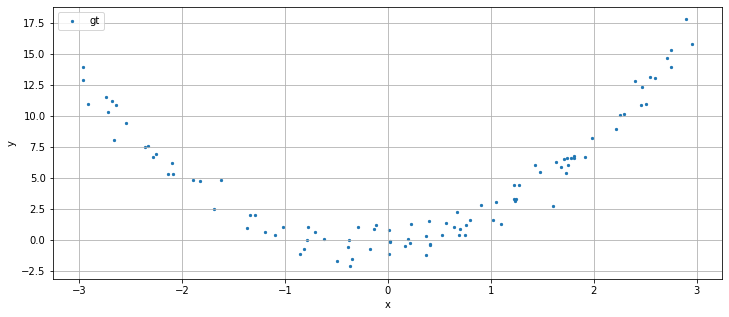

In [30]:
np.random.seed(1234)
_a = np.random.uniform(1, 5)
_b = np.random.uniform(-3, 3)
_c = np.random.uniform(-3, 3)

num_samples = 100

xs = np.random.uniform(-3, 3, size=num_samples)
ys_clean = _a * xs ** 2 + _b * xs + _c
ys_noise = np.random.normal(0, 1, size=len(ys_clean))
ys = ys_clean + ys_noise

plt.figure(figsize=(12, 5))
plt.scatter(xs, ys, label="gt", s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

In [31]:
def model(x, a, b, c):
    return a * x ** 2 + b * x + c

In [32]:
# device = torch.device("cuda:0")
device = torch.device("cpu")

Создадим переменные `xs_device` и `ys_device`, которые будут содержать обучающие данные сразу на нужном девайсе в виде тензоров.

**Вопрос:** `requires_grad=True` или `requires_grad=False`?

In [33]:
# YOUR CODE HERE
xs_device = torch.tensor(xs, device=device, requires_grad=False)
ys_device = torch.tensor(ys, device=device, requires_grad=False)
# END OF YOUR CODE

Теперь инициализируем веса `a`, `b` и `c` нормальным распределением:

In [34]:
# YOUR CODE HERE
a = torch.randn(1, device=device, requires_grad=True)
b = torch.randn(1, device=device, requires_grad=True)
c = torch.randn(1, device=device, requires_grad=True)
# END OF YOUR CODE

Допишем рутину обучения, чтобы получить значения весов модели.

In [35]:
num_epochs = 300
lr = 1e-4
indices = np.arange(len(xs))

loss_list = []
a_list = []
b_list = []
c_list = []


for epoch in tqdm.trange(num_epochs):
    np.random.shuffle(indices)

    loss_epoch = []
    for i in indices:
        # YOUR CODE HERE
        x      = xs_device[i]
        y_true = ys_device[i]
        y_pred = model(x,a,b,c)
        loss = (y_true - y_pred)**2
        loss.backward()
        # END OF YOUR CODE
        
        with torch.no_grad():
            #a.data -= lr * a.grad.data
            #b.data -= lr * b.grad.data
            #c.data -= lr * c.grad.data
            a -= lr * a.grad
            b -= lr * b.grad
            c -= lr * c.grad
            a.grad.zero_()
            b.grad.zero_()
            c.grad.zero_()
            
        loss_epoch.append(loss.item())
        
    loss_list.append(np.mean(loss_epoch))
    a_list.append(a.item())
    b_list.append(b.item())
    c_list.append(c.item())

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:06<00:00, 45.43it/s]


А теперь посмотрим на результаты:

In [36]:
xs_sorted = np.sort(xs)

ys_pred_per_epoch = []
for epoch in range(num_epochs):
    a_epoch = a_list[epoch]
    b_epoch = b_list[epoch]
    c_epoch = c_list[epoch]
    with torch.no_grad():
        ys_pred_epoch = model(xs_sorted, a_epoch, b_epoch, c_epoch)
    ys_pred_per_epoch.append(ys_pred_epoch)

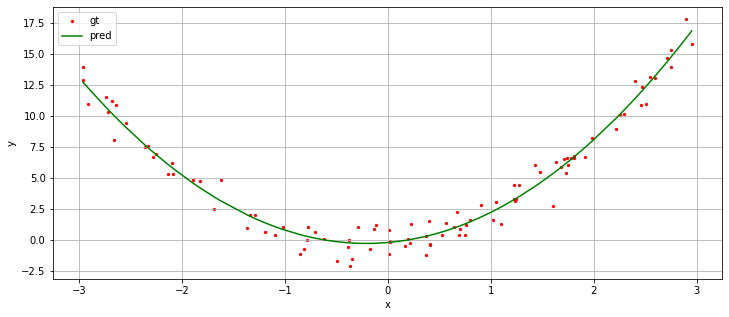

In [37]:
plt.figure(figsize=(12, 5))
plt.scatter(xs, ys, label="gt", s=5, c="r")
plt.plot(xs_sorted, ys_pred_per_epoch[-1], label="pred", c="g")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Если есть нужные зависимости у `jupyterlab` (**осторожно, может все сломать**), можно сделать интерактивно:

In [38]:
#!pip install ipympl

interactive(children=(IntSlider(value=0, description='i', max=299), Output()), _dom_classes=('widget-interact'…

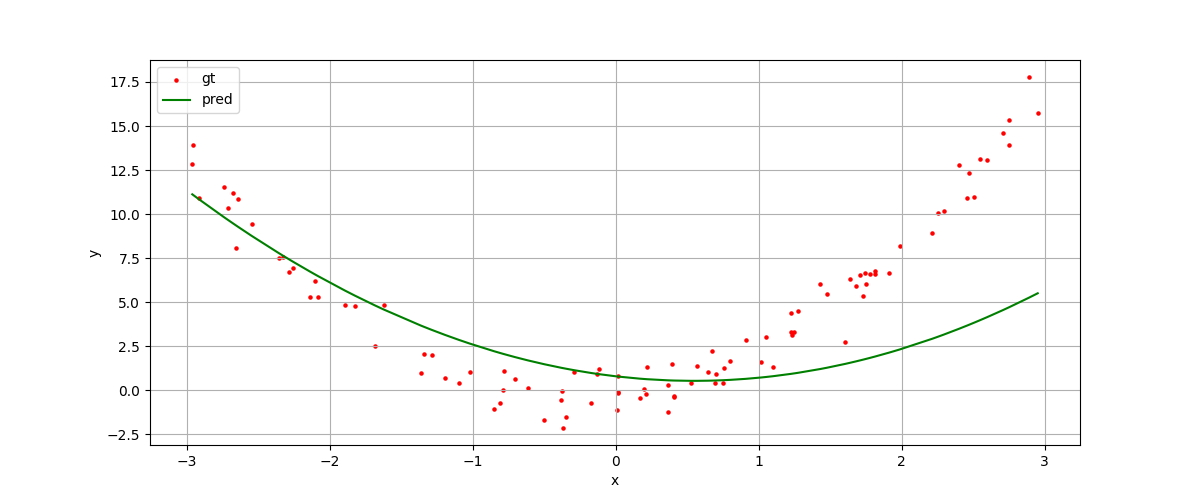

In [39]:
%matplotlib ipympl
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = xs_sorted

def f(x, i):
    return model(x, a_list[i], b_list[i], c_list[i])

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(xs, ys, label="gt", s=5, c="r")
line, = ax.plot(x, f(x, i), label="pred", c="g")

ax.legend()
ax.grid(True)


def update(i=0):
    line.set_ydata(f(x, i))
    fig.canvas.draw_idle()
    
interact(update, i=(0,num_epochs-1,1));

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)
plt.yscale("log")

plt.subplot(1, 2, 2)
for p_name, p_gt, p_list, color in zip(("a", "b", "c"), (_a, _b, _c), (a_list, b_list, c_list), ("r", "g", "b")):
    plt.hlines(y=p_gt, xmin=0, xmax=num_epochs, linestyles="dashed", colors=color)
    plt.scatter(range(len(p_list)), p_list, label=p_name, s=1, c=color)
plt.xlabel("epoch")
plt.ylabel("param value")
plt.legend()
plt.grid(True)

plt.show()

**Вопрос:** если бы это была "настоящая" задача, что следовало бы изменить в данном пайплайне?

## 4. Переопределение `backward`

Что, если нам хочется релизовать кстомный градиент для произвольной функции. 

Зачем?

 - Мы можем знать лучший способ посчитать градиент, чем делать бэкпроп для суперпозиции элементарных функций
 - Можем реализовать численно более устойчивый метод
 - Можем использовать функции из внешних библиотек
 - Использовать недифференцируемые функции?..

Рассмотрим сигмоиду:

$$ 
  \sigma(x) = \frac{1}{1+e^{-x}}
$$

Если честно распишем суперпозицию функций, то получим:

$$
  \sigma(x) = f_1 \odot f_2  \odot f_3 \odot f_4(x), where 
$$

$$
f_1 = \frac{1}{u}, f_2 = 1 + u, f_3 = \exp(u), f_4 = -u
$$

Тогда:

$$
\frac{\partial \sigma}{\partial x} = \frac{\partial \sigma}{\partial f_2}\frac{\partial f_2}{\partial f_3}
\frac{\partial f_3}{\partial f_4}
\frac{\partial f_4}{\partial x}
$$

Но зная как устроена производная можно упростить:

$$
\frac{\partial \sigma}{\partial x} = \sigma(x)(1 - \sigma(x))
$$

Вручную задать градиени функции в библиотеке PyTorch можно создав дочерний класс от [`torch.autograd.Function`](https://pytorch.org/docs/stable/notes/extending.html#extending-torch-autograd).

**NB**: Для того, чтобы сделать `backward()`, требуется знать результат `forward()`. Для этого у переменной контекста есть метод [`save_for_backward()`](https://pytorch.org/docs/stable/generated/torch.autograd.function.FunctionCtx.save_for_backward.html).

In [ ]:
class MySigmoid(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        # YOUR CODE HERE
        
        # val = ...
        
        # END OF YOUR CODE
        return val
    
    @staticmethod
    def backward(ctx, grad_output):
        # YOUR CODE HERE
        
        # val, = ...
        # grad = ...
        
        # END OF YOUR CODE
        return grad

In [ ]:
from torch.autograd import gradcheck

In [ ]:
sigmoid = MySigmoid.apply
x = torch.rand(2, requires_grad=True)
print(gradcheck(sigmoid, x, eps=1e-4, atol=1e-3))

# be sure to use double for better approximation
x = torch.rand(2, requires_grad=True).double()
print(gradcheck(sigmoid, x, eps=1e-6, atol=1e-4))

PyTorch умеет считать матрицу Якоби или матрицу Гессе для заданной функции.

In [ ]:
from torch.autograd.functional import hessian, jacobian

In [ ]:
jacobian(sigmoid, x)

In [ ]:
def sum_sigmoid(x):
    return torch.sum(sigmoid(x))

In [ ]:
hessian(sum_sigmoid, x)

## Итоги

* Узнали, что такое `pytorch` и как в нем работать с тензорами
* Немного погрели GPU, запустив вычисления на нем
* Решили пример задачи, используя только библиотеку `pytorch`
* Написали собственную реализацию сигмоидальной нелинейности

Что еще почитать:
* [A gentle introduction to `torch.autograd`](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)
* [Extending pytorch](https://pytorch.org/docs/stable/notes/extending.html#extending-torch-autograd)

В следующий раз: 
* (наконец-то) нейросети на pytorch